In [ ]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: Exploring Data Visualization</p><br><br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

# Step 1: Initial exploration of the Dataset

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [4]:
# Figure out what is the Country Code of Vietnam
data[data.CountryName.str.contains('Vietnam')].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22799,Vietnam,VNM,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.902520e+01
22800,Vietnam,VNM,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.134621e+01
22801,Vietnam,VNM,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,8.563223e+00
22802,Vietnam,VNM,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,7.278299e+01
22803,Vietnam,VNM,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,6.400000e+07


# Step 2: Continue to explore the dataset

### Lets pick a country and an indicator to explore: Arable land hectares per person and the Vietnam

In [28]:
# select Arable land for Vietnam
hist_indicator = 'Arable land \(hectares per person\)'
hist_country = 'VNM'

# Create filters
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the VNM for country code and Arable land over time.
stage = data[mask1 & mask2]

In [29]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
49343,Vietnam,VNM,Arable land (hectares per person),AG.LND.ARBL.HA.PC,1961,0.156656
77766,Vietnam,VNM,Arable land (hectares per person),AG.LND.ARBL.HA.PC,1962,0.153642
106386,Vietnam,VNM,Arable land (hectares per person),AG.LND.ARBL.HA.PC,1963,0.150668
135441,Vietnam,VNM,Arable land (hectares per person),AG.LND.ARBL.HA.PC,1964,0.147709
167408,Vietnam,VNM,Arable land (hectares per person),AG.LND.ARBL.HA.PC,1965,0.144754


### Let's see how arable land have changed over time using MatplotLib

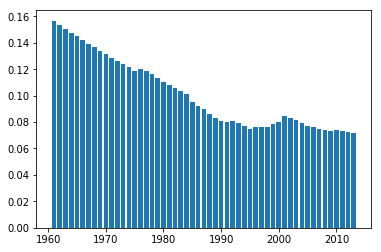

In [52]:
# get the years
years = stage['Year'].values # return numpy array
# get the values 
arable_land = stage['Value'].values

# Get the last year
# print(years)

# create
plt.bar(years,arable_land)
plt.show()

Turns out arable land reduced over time, but let's make this graphic a bit more appealing before we continue to explore it.

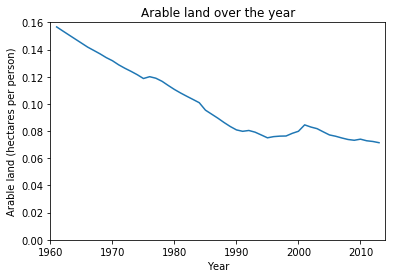

In [53]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('Arable land over the year')

# to make more honest, start they y axis at 0
plt.axis([1960, 2014, 0, 0.16])

plt.show()

# Step 3: Research Question
## How does GDP affect the arable land per person?

### Relationship between GDP and Arable land in Vietnam

In [54]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'VNM'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the VNM for country code and Arable land over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [55]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1431540,Vietnam,VNM,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1984,262.954377
1519020,Vietnam,VNM,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1985,267.509107


In [56]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
49343,Vietnam,VNM,Arable land (hectares per person),AG.LND.ARBL.HA.PC,1961,0.156656
77766,Vietnam,VNM,Arable land (hectares per person),AG.LND.ARBL.HA.PC,1962,0.153642


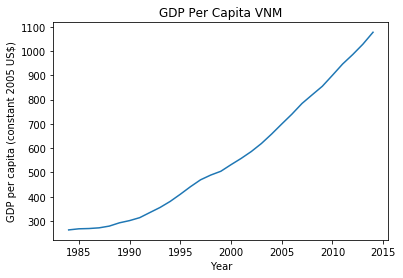

In [57]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita VNM')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

Although arable land reduces over time, GDP increased.

### ScatterPlot for comparing GDP against Arable land (hectares per person)

First, we'll need to make sure we're looking at the same time frames

In [61]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("Arable land Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1984 max:  2014
Arable land Min Year =  1961 max:  2013


Let's pick the data from 1984 to 2013.

In [59]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2014]
stage_trunc = stage[stage['Year'] > 1983]
print(len(gdp_stage_trunc))
print(len(stage_trunc))

30
30


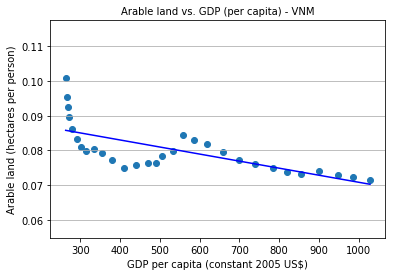

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Arable land vs. GDP (per capita) - VNM',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage_trunc['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage_trunc['Value']

axis.scatter(X, Y)

# Find the slope and intercept of the best fit line
slope, intercept = np.polyfit(X, Y, 1)
# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in X]
plt.plot(X, abline_values, 'b')

plt.show()

This looks like a opposite relationship.  We will test this by looking at correlation.

In [51]:
np.corrcoef(gdp_stage_trunc['Value'],stage_trunc['Value'])

array([[ 1.        , -0.70609641],
       [-0.70609641,  1.        ]])

A correlation of -0.70 is a strong negative correlation. With the increase of GDP the arable land reduced.